In [281]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale 
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

In [282]:
# Read CSV file which is using space as delimiter
df = pd.read_csv("House price dataset.csv",header=None,delim_whitespace=True)
# explore data
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [283]:
columns = df.columns
# select columns for input
inputX = df[[0, 1, 2,3,4,5,6,7,8,9,10,11,12]]
# output data column
outputY = df[[13]]

In [284]:
# See input X
inputX

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10


In [285]:
# Do PCA to analyze contribution of data
pca = PCA(n_components=13)
principle_components = pca.fit_transform(inputX)
# visualize principle component in dataframe
# principle_components_df = pd.DataFrame(data=principle_components)
# See contribution of selected principle component
import numpy as np
print("contribution: {}".format(pca.explained_variance_ratio_))
# Maximum variance ratio
max_var = max(pca.explained_variance_ratio_)
# Index of maximum variance in columns of input data
argmax_idx = np.argmax(pca.explained_variance_ratio_)
print("best variance column is ", argmax_idx)
min_var = min(pca.explained_variance_ratio_)
argmin_idx = np.argmin(pca.explained_variance_ratio_)
print("the worst variance column is ", argmin_idx)

contribution: [8.05823175e-01 1.63051968e-01 2.13486092e-02 6.95699061e-03
 1.29995193e-03 7.27220158e-04 4.19044539e-04 2.48538539e-04
 8.53912023e-05 3.08071548e-05 6.65623182e-06 1.56778461e-06
 7.96814208e-08]
best variance column is  0
the worst variance column is  12


1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 5. NOX: nitric oxides concentration (parts per 10 million) 1
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per \$10,000
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk − 0.63)2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000s

Generate a table with the main statistics of the distribution 
(i.e. mean, standard deviation, median, min and max) of each attribute. 
Besides, calculate the correlation between all of the numeric attributes. Which are the variables with “best” and “worst” correlation respect to the variable to predict (MEDV)?.

In [286]:
arr_mean = inputX.mean()
arr_std = inputX.std()
arr_min = inputX.min()
arr_max = inputX.max()
arr_median = inputX.median()

In [287]:
# Create table to display statistic result
# mean, standard deviation, median, min and max
stat_df = pd.DataFrame({'mean': arr_mean, 'std': arr_std, 'median': arr_median, 'min': arr_min, 'max': arr_max})

In [288]:
stat_df

,mean,std,median,min,max
0,3.613524,8.601545,0.25651,0.00632,88.9762
1,11.363636,23.322453,0.00000,0.00000,100.0000
2,11.136779,6.860353,9.69000,0.46000,27.7400
3,0.069170,0.253994,0.00000,0.00000,1.0000
4,0.554695,0.115878,0.53800,0.38500,0.8710
5,6.284634,0.702617,6.20850,3.56100,8.7800
6,68.574901,28.148861,77.50000,2.90000,100.0000
7,3.795043,2.105710,3.20745,1.12960,12.1265
8,9.549407,8.707259,5.00000,1.00000,24.0000
9,408.237154,168.537116,330.00000,187.00000,711.0000


In [289]:
# correlation
inputX.corr('pearson')

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [290]:
# correlation of all input X and y (column 13)
# np.corrcoef(x, y)
df.corr()
# Task: Find best and worst for predicting y
# worst = CHAS 3
# best = LSTAT 12

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [291]:
# task: split train:test by ratio 0.8:0.2
# task: select one variable to train
# select_input_column = argmax_idx
select_input_column = 12
select_input = df[[select_input_column]]

In [292]:
# Train for one selected column and test
X_train1, X_test1, y_train1, y_test1 = train_test_split(select_input, outputY, test_size=0.2)
print("X train: ",str(X_train1.shape))
print("y train: ",str(y_train1.shape))
print("X test: ",str(X_test1.shape))
print("y test: ",str(y_test1.shape))
print("train size: ",str(X_train1.size))
rgs = LinearRegression()
rgs.fit(X_train1, y_train1)
pred1 = rgs.predict(X_test1)

print("MSE: ", mean_squared_error(pred1, y_test1))

X train:  (404, 1)
y train:  (404, 1)
X test:  (102, 1)
y test:  (102, 1)
train size:  404
MSE:  32.747900341152835


In [293]:
#Task: 
# - Apply PCA, start from 1 component,
# - calculate standard error
# - in crease component

# Split data from all columns (13 columns) to train and test data 
# which 20% of data will be testing data.

X_train, X_test, y_train, y_test = train_test_split(inputX, outputY, test_size=0.2)

# Prepare array for plotting graph
pcr_errors = []
pls_errors = []
number_components = []

# Get number of columns from input data
ori_input_columns = inputX.shape[1]
# Loop for each n columns 
for i in range(ori_input_columns):
    # Reduce dimension by PCA.
    n_comp = i+1
    pca = PCA(n_components=n_comp)
    principle_components = pca.fit_transform(X_train)
    
    # Initialize linear regression model
    rgrs = LinearRegression()
    
    #proj = pca.inverse_transform(principle_components)
    #print(proj)
    #print("size", proj.shape)
    
    # Train the model
    rgrs.fit(principle_components, y_train)
    
    
    # number of column for current iteration
    reduced_dim_x_test = pca.transform(X_test)
    # predict
    y_pred = rgrs.predict(reduced_dim_x_test)
    # y_true, y_predict
    pcr_mse = mean_squared_error(y_test, y_pred)
    # Keep MSE to array
    pcr_errors.append(pcr_mse)

    print("PCR MSE ", mse)
    
    # PLS algorithm
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X_train, y_train)
    pls_pred = pls.predict(X_test)
    # y_true, y_predict
    pls_mse = mean_squared_error(y_test, pls_pred)
    pls_errors.append(pls_mse)
    # print("PLS MSE ", pls_mse)
    number_components.append(n_comp)


PCR MSE  217101.51053140438
PCR MSE  217101.51053140438
PCR MSE  217101.51053140438
PCR MSE  217101.51053140438
PCR MSE  217101.51053140438
PCR MSE  217101.51053140438
PCR MSE  217101.51053140438
PCR MSE  217101.51053140438
PCR MSE  217101.51053140438
PCR MSE  217101.51053140438
PCR MSE  217101.51053140438
PCR MSE  217101.51053140438
PCR MSE  217101.51053140438


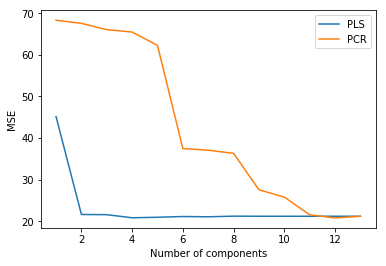

In [280]:
#Plot result
import matplotlib.pyplot as plt
# Plot p
fig = plt.figure()
plt.title("")
plt.plot(number_components, pls_errors, label="PLS")
plt.plot(number_components, pcr_errors,label="PCR")
plt.xlabel("Number of components")
plt.ylabel("MSE")
plt.legend()
# handles, labels = ax.get_legend_handles_labels()
# plt.legend(handles, labels, loc='upper center')